In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cx_Oracle

db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from PURPRD_YM")
x = cursor.fetchall()
purprd_ym = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='PURPRD_YM'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
purprd_ym.columns = list1
purprd_ym.head()

,SHOP,CUST_NO,PUR_YM,NEW_CAT,GENDER,AGE,AREA,PUR_AMT,AM_AMT,PM_AMT,OT_AMT,CAT_CNT,PUR_CNT,QUARTER,HALF
0,A,2,1401,농산물,M,60세이상,1,468010,462010,6000,0,30,17,14_q1,14_h1
1,A,2,1401,수산물,M,60세이상,1,233000,233000,0,0,2,2,14_q1,14_h1
2,A,2,1401,가공식품,M,60세이상,1,138080,138080,0,0,12,11,14_q1,14_h1
3,A,2,1402,육류,M,60세이상,1,21900,15600,6300,0,3,3,14_q1,14_h1
4,A,2,1402,주류,M,60세이상,1,2000,2000,0,0,1,1,14_q1,14_h1


In [3]:
cursor.close()
db.close()

In [4]:
purprd_ym['SHOP'].value_counts()

B    1186830
A     759369
C     756747
Name: SHOP, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
purprd_ym['SHOP'] = le.fit_transform(purprd_ym['SHOP'])
purprd_ym['SHOP'].value_counts()

1    1186830
0     759369
2     756747
Name: SHOP, dtype: int64

In [6]:
le = LabelEncoder()
purprd_ym['AGE'] = le.fit_transform(purprd_ym['AGE'])
purprd_ym['AGE'].value_counts()

6    589703
5    526697
7    442960
4    394620
8    250651
3    220978
9    182021
2     71356
1     22452
0      1508
Name: AGE, dtype: int64

In [7]:
le = LabelEncoder()
purprd_ym['NEW_CAT'] = le.fit_transform(purprd_ym['NEW_CAT'])
purprd_ym['NEW_CAT'].value_counts()

0    647484
1    537216
4    486717
3    400657
2    364119
5    266753
Name: NEW_CAT, dtype: int64

In [8]:
le = LabelEncoder()
purprd_ym['QUARTER'] = le.fit_transform(purprd_ym['QUARTER'])

le = LabelEncoder()
purprd_ym['HALF'] = le.fit_transform(purprd_ym['HALF'])

<AxesSubplot:>

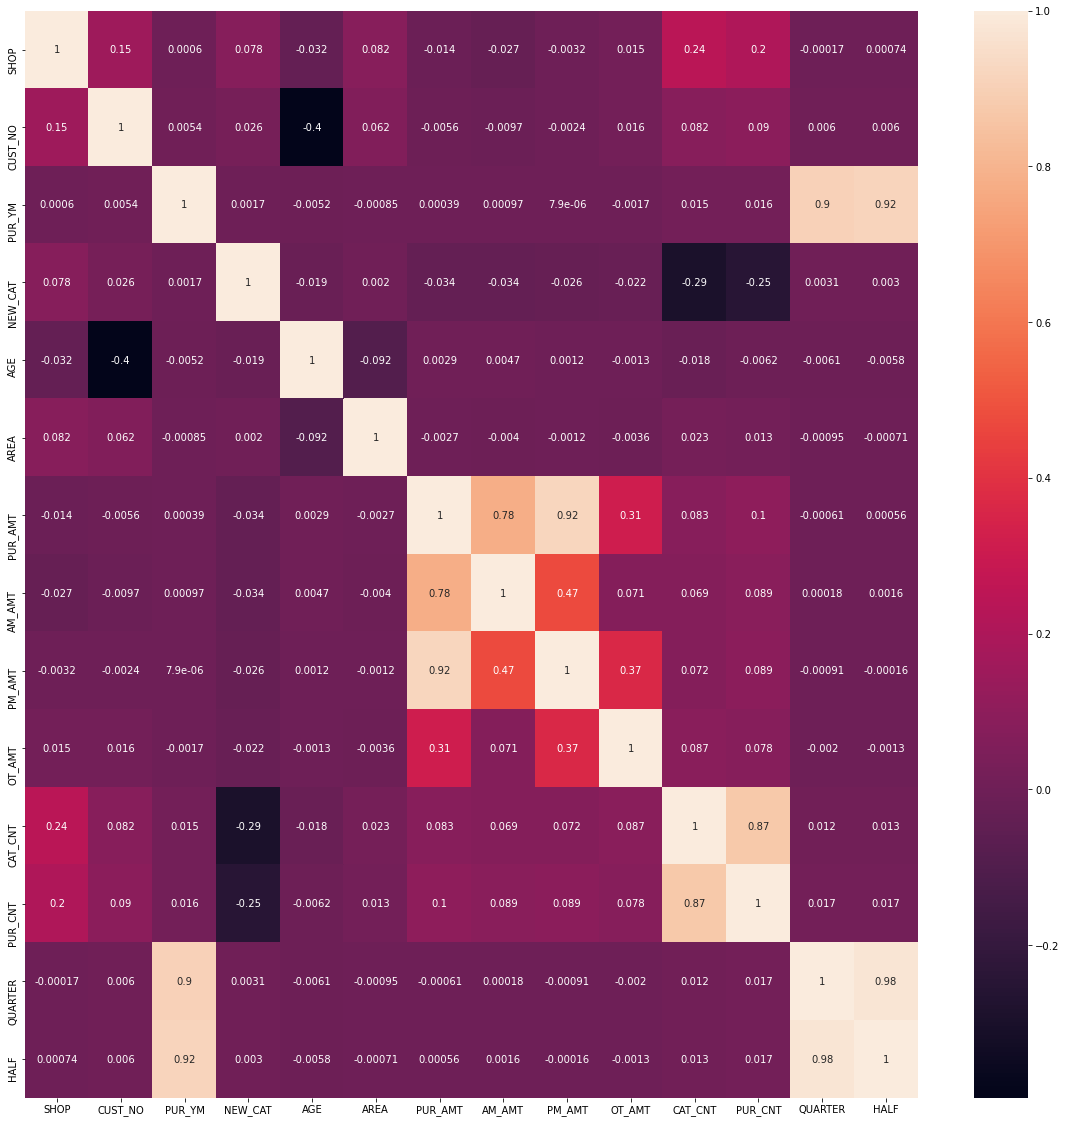

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(purprd_ym.corr(), annot=True)

In [11]:
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from LMEMBER1")
x = cursor.fetchall()
lmember1 = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='LMEMBER1'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
lmember1.columns = list1

cursor.close()
db.close()

In [12]:
lmember1.head()

,SHOP,CUST_NO,NEW_CAT,GENDER,AGE,AREA,PUR_QUARTER,COMPETITOR,MEMBERSHIP,ON_LINE,MOBILE,SUM_PUR14,SUM_PUR15,SUM_PUR14_1,Q_RESULT
0,A,00854,가공식품,M,55세~59세,6,Q1,0,0,0,0,30700,28500,1228.0,0
1,A,00859,음료,M,55세~59세,2,Q1,0,0,0,0,30700,24950,1228.0,0
2,A,00885,음료,F,55세~59세,3,Q1,0,0,0,1,41800,18500,1672.0,0
3,A,00889,육류,F,55세~59세,2,Q1,0,0,0,0,15000,0,600.0,1
4,A,00891,농산물,M,55세~59세,2,Q1,1,1,0,0,202200,321420,8088.0,0


In [16]:
lmember1['SHOP'] = le.fit_transform(lmember1['SHOP'])
lmember1['AGE'] = le.fit_transform(lmember1['AGE'])
lmember1['NEW_CAT'] = le.fit_transform(lmember1['NEW_CAT'])
lmember1['PUR_QUARTER'] = le.fit_transform(lmember1['PUR_QUARTER'])

In [19]:
lmember1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712399 entries, 0 to 712398
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SHOP         712399 non-null  int64  
 1   CUST_NO      712399 non-null  object 
 2   NEW_CAT      712399 non-null  int64  
 3   GENDER       712399 non-null  object 
 4   AGE          712399 non-null  int64  
 5   AREA         712399 non-null  int64  
 6   PUR_QUARTER  712399 non-null  int32  
 7   COMPETITOR   712399 non-null  int64  
 8   MEMBERSHIP   712399 non-null  int64  
 9   ON_LINE      712399 non-null  int64  
 10  MOBILE       712399 non-null  int64  
 11  SUM_PUR14    712399 non-null  int64  
 12  SUM_PUR15    712399 non-null  int64  
 13  SUM_PUR14_1  712399 non-null  float64
 14  Q_RESULT     712399 non-null  int64  
dtypes: float64(1), int32(1), int64(11), object(2)
memory usage: 78.8+ MB


In [21]:
lmember1['GENDER'] = le.fit_transform(lmember1['GENDER'])
lmember1['CUST_NO'] = lmember1['CUST_NO'].astype('int')

<AxesSubplot:>

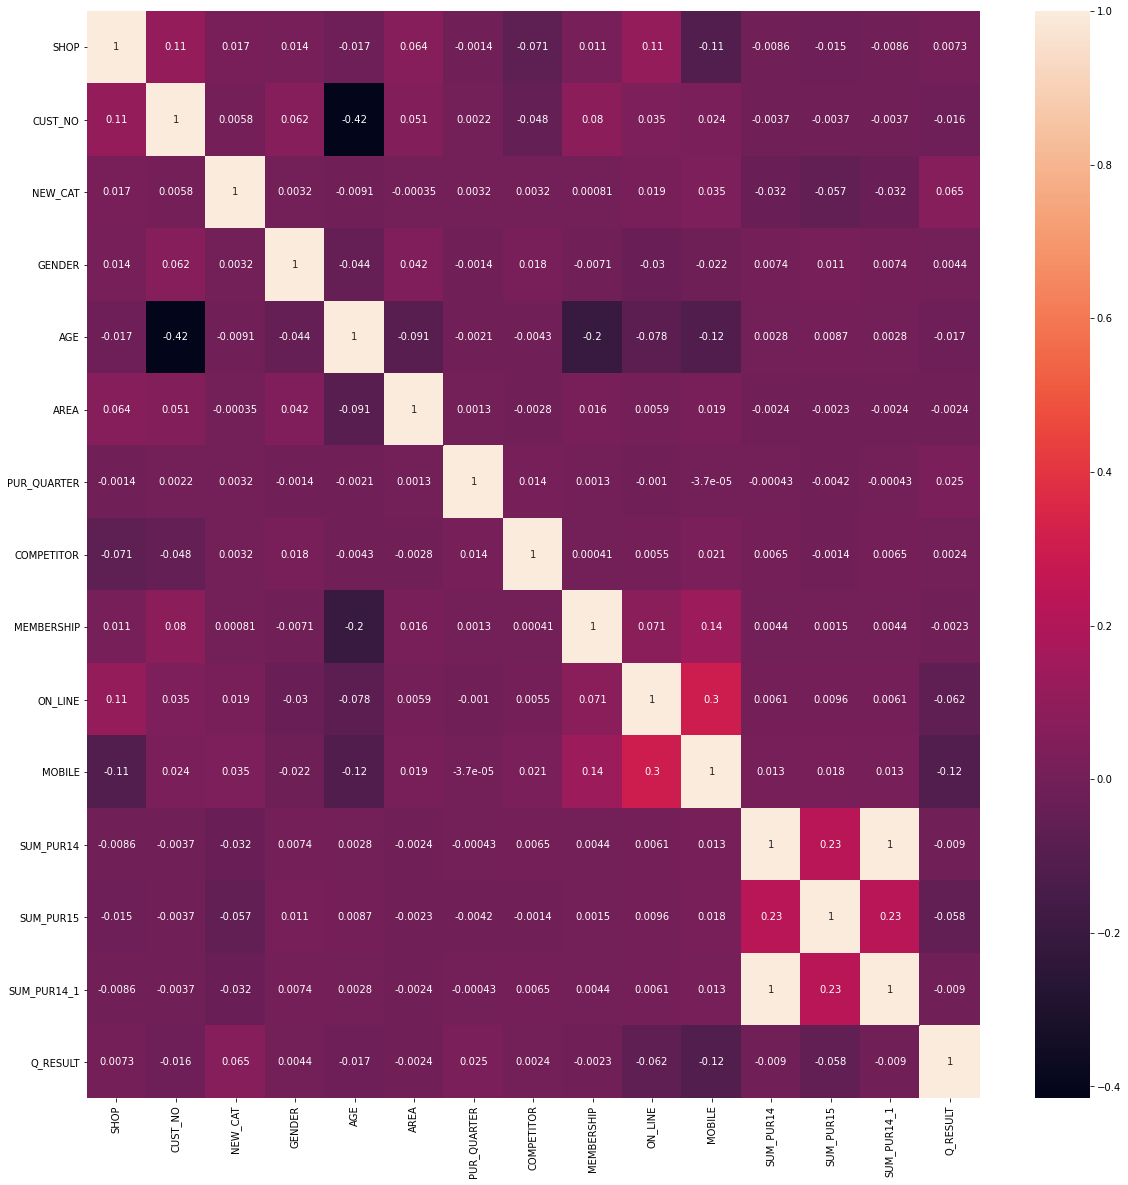

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(lmember1.corr(), annot=True)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [28]:
X_data = lmember1.drop('Q_RESULT', axis=1)
X_data.columns

Index(['SHOP', 'CUST_NO', 'NEW_CAT', 'GENDER', 'AGE', 'AREA', 'PUR_QUARTER',
       'COMPETITOR', 'MEMBERSHIP', 'ON_LINE', 'MOBILE', 'SUM_PUR14',
       'SUM_PUR15', 'SUM_PUR14_1'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split

X_data = lmember1.drop('Q_RESULT', axis=1)
y_target = lmember1['Q_RESULT']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, random_state=0)
X_train = pd.DataFrame(X_train, columns = X_data.columns)
y_train = pd.DataFrame(y_train)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)
features = X_train.columns.values
print('------Training Done --------')

------Training Done --------


In [31]:
trace = go.Scatter(
y = rf.feature_importances_,
x = features,
mode = 'markers',
marker = dict(
    sizemode = 'diameter',
    sizeref = 1,
    size = 13,
    color = rf.feature_importances_,
    colorscale = 'Portland',
    showscale = True), text = features)
data = [trace]